In [15]:
import random
import matplotlib.pyplot as plt

In [12]:
class Person:
    def __init__(self, gender, age, education_level, first_name, last_name, average_balance, average_transactions, average_income, average_expenses):
        self.gender = gender
        self.age = age
        self.education_level = education_level
        self.first_name = first_name
        self.last_name = last_name
        self.average_balance = average_balance
        self.average_transactions = average_transactions
        self.average_income = average_income
        self.average_expenses = average_expenses

    def generate_bank_balance(self):
        balance = self.average_balance + random.uniform(-0.5 * self.average_balance, 0.5 * self.average_balance)
        return balance

    def generate_number_of_transactions(self):
        transactions = round(self.average_transactions + random.uniform(-0.5 * self.average_transactions, 0.5 * self.average_transactions))
        return transactions

    def generate_income_transactions(self):
        income = round(self.average_income + random.uniform(-0.5 * self.average_income, 0.5 * self.average_income))
        return income

    def generate_expenses_transactions(self):
        expenses = round(self.average_expenses + random.uniform(-0.5 * self.average_expenses, 0.5 * self.average_expenses))
        return expenses


# Example usage
person1 = Person("Male", 27, "Bachelor's", "Ricardo", "Muñoz Romero", 5000, 10, 2000, 1500)

print("Name:", person1.first_name, person1.last_name)
print("Gender:", person1.gender)
print("Age:", person1.age)
print("Education Level:", person1.education_level)

# Generating bank balance
bank_balance = person1.generate_bank_balance()
print("Bank Balance:", bank_balance)

# Generating number of transactions
num_transactions = person1.generate_number_of_transactions()
print("Number of Transactions:", num_transactions)

# Generating income transactions
income_transactions = person1.generate_income_transactions()
print("Income Transactions:", income_transactions)

# Generating expenses transactions
expenses_transactions = person1.generate_expenses_transactions()
print("Expenses Transactions:", expenses_transactions)

Name: Ricardo Muñoz Romero
Gender: Male
Age: 27
Education Level: Bachelor's
Bank Balance: 3259.6648399489295
Number of Transactions: 9
Income Transactions: 2505
Expenses Transactions: 850


In [14]:
def simulate_transactions(person):
    current_balance = person.average_balance
    day = 1

    while current_balance > 0 and current_balance <= 2 * person.average_balance:
        print(f"Day {day}: Balance - {current_balance}")

        # Generate transactions for the day
        num_transactions = person.generate_number_of_transactions()
        for _ in range(num_transactions):
            if random.random() < 0.5:  # 50% chance of income transaction
                transaction_amount = person.generate_income_transactions()
                current_balance += transaction_amount
                print(f"  Income Transaction: +{transaction_amount}")
            else:  # 50% chance of expense transaction
                transaction_amount = person.generate_expenses_transactions()
                current_balance -= transaction_amount
                print(f"  Expense Transaction: -{transaction_amount}")

        day += 1

    if current_balance <= 0:
        print("Simulation ended: Bank balance reached zero.")
    elif current_balance > 2 * person.average_balance:
        print("Simulation ended: Bank balance is twice the starting balance.")


# Example usage
person1 = Person("Male", 27, "Bachelor's", "Ricardo", "Muñoz Romero", 5000, 10, 2000, 1500)
simulate_transactions(person1)

Day 1: Balance - 5000
  Income Transaction: +1870
  Income Transaction: +1336
  Expense Transaction: -2150
  Expense Transaction: -1153
  Income Transaction: +2624
  Income Transaction: +2851
  Expense Transaction: -1487
  Income Transaction: +1562
  Expense Transaction: -1915
  Expense Transaction: -2101
  Expense Transaction: -1450
  Income Transaction: +2842
  Expense Transaction: -1824
  Expense Transaction: -780
Day 2: Balance - 5225
  Income Transaction: +1886
  Expense Transaction: -927
  Income Transaction: +1093
  Income Transaction: +2552
  Expense Transaction: -1773
  Expense Transaction: -2172
  Income Transaction: +2882
  Expense Transaction: -1694
  Income Transaction: +1690
  Income Transaction: +2460
  Income Transaction: +2102
  Expense Transaction: -1478
Simulation ended: Bank balance is twice the starting balance.


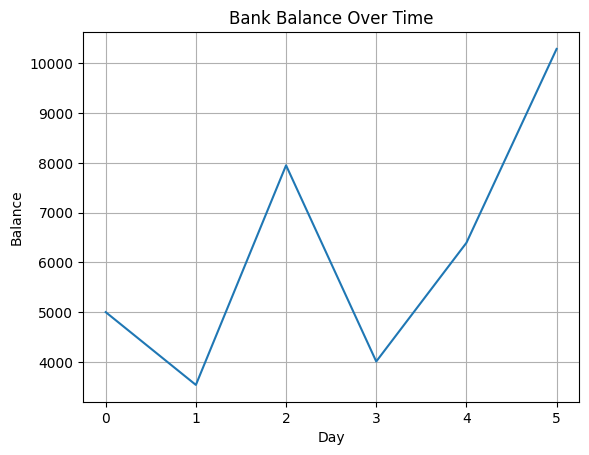

Simulation ended: Bank balance is twice the starting balance.


In [44]:
def simulate_transactions(person):
    current_balance = person.average_balance
    day = 1
    balance_history = [current_balance]  # List to store balance at each day

    while current_balance > 0 and current_balance <= 2 * person.average_balance:
        # Generate transactions for the day
        num_transactions = person.generate_number_of_transactions()
        for _ in range(num_transactions):
            if random.random() < 0.5:  # 50% chance of income transaction
                transaction_amount = person.generate_income_transactions()
                current_balance += transaction_amount
            else:  # 50% chance of expense transaction
                transaction_amount = person.generate_expenses_transactions()
                current_balance -= transaction_amount
        
        # Store current balance in history
        balance_history.append(current_balance)

        day += 1

    # Plotting balance over time
    plt.plot(range(day), balance_history)
    plt.xlabel('Day')
    plt.ylabel('Balance')
    plt.title('Bank Balance Over Time')
    plt.grid(True)
    plt.show()

    if current_balance <= 0:
        print("Simulation ended: Bank balance reached zero.")
    elif current_balance > 2 * person.average_balance:
        print("Simulation ended: Bank balance is twice the starting balance.")

# Example usage
person1 = Person("Male", 27, "Bachelor's", "Ricardo", "Muñoz Romero", 5000, 10, 2000, 1500)
simulate_transactions(person1)

Simulation ended: Bank balance negative for 2 consecutive days.


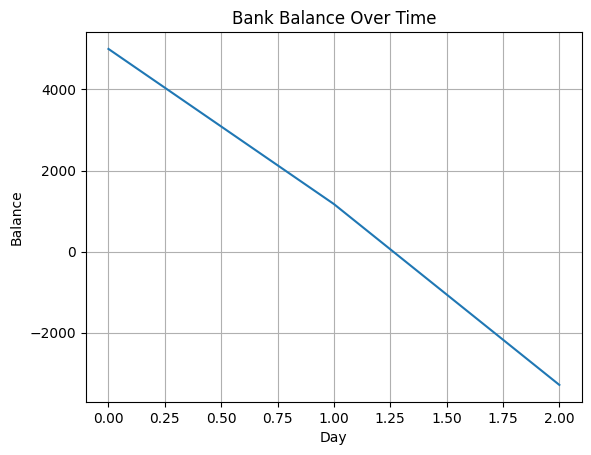

In [124]:
def simulate_transactions(person):
    current_balance = person.average_balance
    day = 1
    balance_history = [current_balance]  # List to store balance at each day
    consecutive_negative_days = 0

    while current_balance < 10 * person.average_balance:
        # Generate transactions for the day
        num_transactions = person.generate_number_of_transactions()
        daily_income = 0
        daily_expenses = 0
        for _ in range(num_transactions):
            if random.random() < 0.5:  # 50% chance of income transaction
                transaction_amount = person.generate_income_transactions()
                current_balance += transaction_amount
                daily_income += transaction_amount
            else:  # 50% chance of expense transaction
                transaction_amount = person.generate_expenses_transactions()
                current_balance -= transaction_amount
                daily_expenses += transaction_amount
        
        # Check if balance is negative for consecutive days
        if current_balance < 0:
            consecutive_negative_days += 1
            if consecutive_negative_days >= 2:
                print("Simulation ended: Bank balance negative for 2 consecutive days.")
                break
        else:
            consecutive_negative_days = 0

        # Store current balance in history
        balance_history.append(current_balance)

        day += 1

    # Plotting balance over time
    plt.plot(range(day), balance_history)
    plt.xlabel('Day')
    plt.ylabel('Balance')
    plt.title('Bank Balance Over Time')
    plt.grid(True)
    plt.show()

    if current_balance >= 10 * person.average_balance:
        print("Simulation ended: Bank balance is 10 times the starting balance.")

# Example usage
person1 = Person("Male", 27, "Bachelor's", "Ricardo", "Muñoz Romero", 5000, 10, 3000, 2000)
simulate_transactions(person1)

In [106]:
def simulate_transactions(person):
    current_balance = person.average_balance
    day = 1
    balance_history = [current_balance]  # List to store balance at each day
    consecutive_negative_days = 0

    while current_balance < 10 * person.average_balance:
        # Generate transactions for the day
        num_transactions = person.generate_number_of_transactions()
        daily_income = 0
        daily_expenses = 0
        for _ in range(num_transactions):
            if random.random() < 0.5:  # 50% chance of income transaction
                transaction_amount = person.generate_income_transactions()
                current_balance += transaction_amount
                daily_income += transaction_amount
            else:  # 50% chance of expense transaction
                transaction_amount = person.generate_expenses_transactions()
                current_balance -= transaction_amount
                daily_expenses += transaction_amount
        
        # Check if balance is negative for consecutive days
        if current_balance < 0:
            consecutive_negative_days += 1
            if consecutive_negative_days >= 2:
                return "Negative Balance"

        else:
            consecutive_negative_days = 0

        # Store current balance in history
        balance_history.append(current_balance)

        day += 1

    if current_balance >= 10 * person.average_balance:
        return "Ten Times Balance"

    return "Not Converged"


# Run 100 simulations
num_simulations = 100
ten_times_balance_count = 0
zero_balance_count = 0

for _ in range(num_simulations):
    result = simulate_transactions(person1)
    if result == "Ten Times Balance":
        ten_times_balance_count += 1
    elif result == "Negative Balance":
        zero_balance_count += 1

print(f"Number of simulations ending with ten times the balance: {ten_times_balance_count}")
print(f"Number of simulations ending with zero balance: {zero_balance_count}")

Number of simulations ending with ten times the balance: 88
Number of simulations ending with zero balance: 12
